<p><font size="6"><b>Visualisation: Seaborn </b></font></p>

> *DS Data manipulation, analysis and visualization in Python*  
> *May/June, 2021*
>
> *© 2020, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Seaborn

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library:

* Built on top of Matplotlib, but providing
    1. High level functions.
    2. Support for _tidy data_, which became famous due to the `ggplot2` R package.
    3. Attractive and informative statistical graphics out of the box.
* Interacts well with Pandas

In [2]:
import seaborn as sns

## Introduction

We will use the Titanic example data set:

In [3]:
titanic = pd.read_csv('data/titanic.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's consider following question:
>*For each class at the Titanic, how many people survived and how many died?*

Hence, we should define the *size/count* of respectively the zeros (died) and ones (survived) groups of column `Survived`, also grouped by the `Pclass`. In Pandas terminology:

In [6]:
survived_stat = titanic.groupby(["Pclass", "Survived"]).size().rename('count').reset_index()
survived_stat
# Remark: the `rename` syntax is to provide the count column with a column name 

,Pclass,Survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


Providing this data in a bar chart with pure Pandas is still partly supported:

<AxesSubplot:xlabel='Survived'>

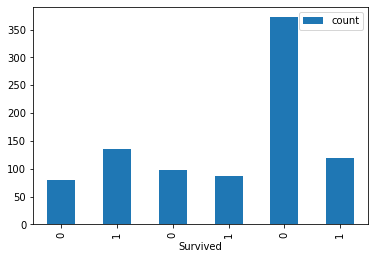

In [8]:
survived_stat.plot(x='Survived', y='count', kind='bar')
## A possible other way of plotting this could be using groupby again:   
# survived_stat.groupby('Pclass').plot(x='Survived', y='count', kind='bar') # (try yourself by uncommenting)

but with mixed results. The default Pandas plotting functionalities are not sufficient.

__Seaborn__ provides another level of abstraction to visualize such *grouped* plots with different categories:

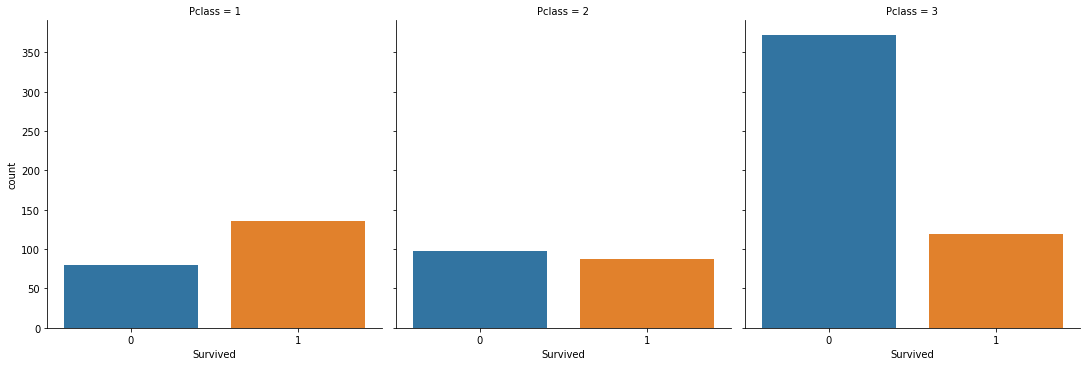

In [9]:
sns.catplot(data=survived_stat, 
            x="Survived", y="count", 
            col="Pclass", kind="bar")

Moreover, these `count` operations are embedded in Seaborn (similar to other 'Grammar of Graphics' packages such as ggplot in R and Plotnine/Altair in Python). We can do these operations directly on the original `titanic` data set in a single coding step:

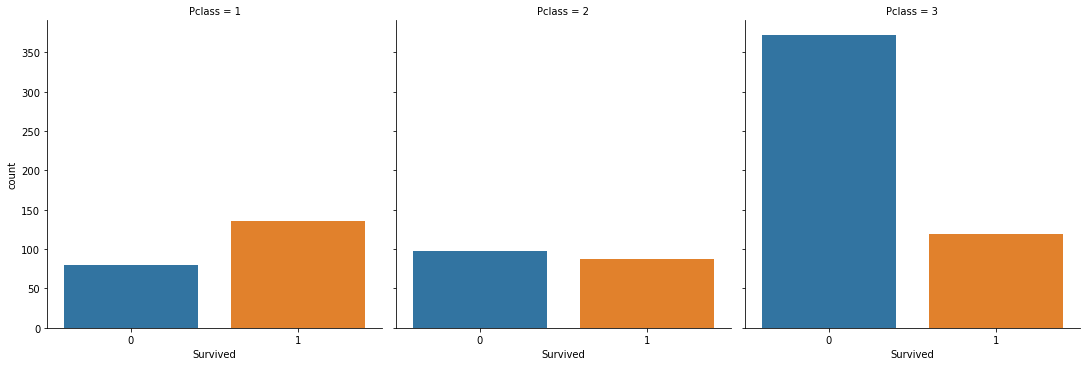

In [10]:
sns.catplot(data=titanic, 
            x="Survived", 
            col="Pclass", kind="count")

Check <a href="#this_is_tidy">here</a> for a short recap about `tidy` data.

<div class="alert alert-info">

**Remember**

- Seaborn is especially suitable for these so-called <a href="http://vita.had.co.nz/papers/tidy-data.pdf">tidy</a> DataFrame representations.
- The [Seaborn tutorial](https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data) provides a very good introduction to tidy (also called _long-form_) data. 
- You can use __Pandas column names__ as input for the visualization functions of Seaborn.

</div>

## Interaction with Matplotlib

Seaborn builds on top of Matplotlib/Pandas, adding an additional layer of convenience. 

Topic-wise, Seaborn provides three main modules, i.e. type of plots:

- __relational__: understanding how variables in a data set relate to each other
- __distribution__: specialize in representing the distribution of data points
- __categorical__: visualize a relationship involving categorical data (i.e. plot something _for each category_)

In 'technical' terms, when working with Seaborn functions, it is important to understand which level of Matplotlib object they operate, as `Axes-level` or `Figure-level`: 

- __axes-level__ functions plot data onto a single `matplotlib.pyplot.Axes` object and return the `Axes`
- __figure-level__ functions return a Seaborn object, `FacetGrid`, which is a `matplotlib.pyplot.Figure`

_Remember the Matplotlib `Figure`, `axes` and `axis` anatomy explained in [visualization_01_matplotlib](visualization_01_matplotlib.ipynb)?_

Each plot module has a single `Figure`-level function, which offers a unitary interface to its various `Axes`-level functions. The organization looks like this:

![](../img/seaborn_overview_modules.png)

### Figure level functions

Let's start from: _What is the relation between Age and Fare?_

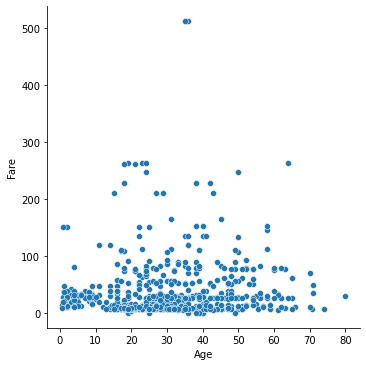

In [11]:
# A relation between variables in a Pandas DataFrame -> `relplot`
sns.relplot(data=titanic, x="Age", y="Fare")

Extend to: _Is the relation between Age and Fare different for people how survived?_

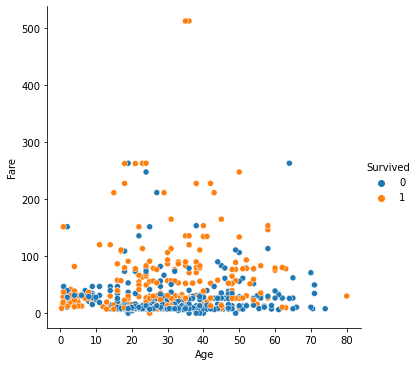

In [14]:
# Include the 'survived' variable (column name) into the plot function to define the color
sns.relplot(data=titanic, x="Age", y="Fare",
            hue="Survived")

Extend to: _Is the relation between Age and Fare different for people how survived and/or the gender of the passengers?_

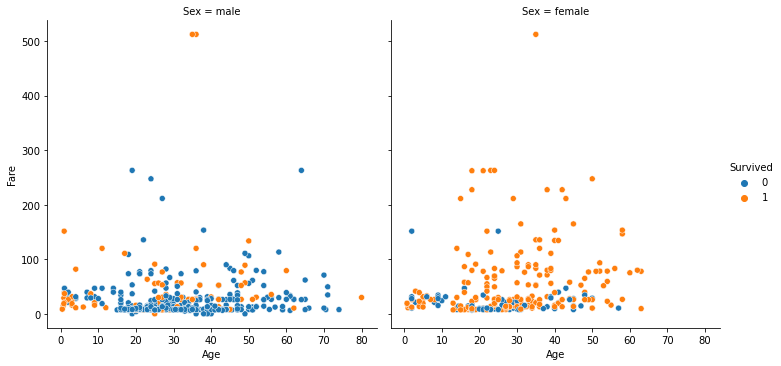

In [15]:
# Include the 'sex' variable (column name) into the plot function to split into subplots
age_fare = sns.relplot(data=titanic, x="Age", y="Fare",
                       hue="Survived",
                       col="Sex")

The function returns a Seaborn `FacetGrid`, which is directly related to a Matplotlib `Figure`:

In [17]:
type(age_fare), type(age_fare.fig)

(seaborn.axisgrid.FacetGrid, matplotlib.figure.Figure)

In the last example, we are dealing here with 2 subplots. Hence, the `FacetGrid` consists of two Matplotlib `Axes`:

In [18]:
age_fare.axes, type(age_fare.axes.flatten()[0])

(array([[<AxesSubplot:title={'center':'Sex = male'}, xlabel='Age', ylabel='Fare'>,
         <AxesSubplot:title={'center':'Sex = female'}, xlabel='Age'>]],
       dtype=object),
 matplotlib.axes._subplots.AxesSubplot)

Hence, we can still apply all the power of Matplotlib, but start from the convenience of Seaborn.

<div class="alert alert-info">

**Remember**

The `Figure` level Seaborn functions:    
    
- Support __faceting__ by data variables (split up in subplots using a categorical variable)
- Return a Matplotlib `Figure`, hence the output can NOT be part of a larger Matplotlib Figure

</div>

### Axes level functions

We can ask the same question: _Is the relation between Age and Fare different for people how survived?_

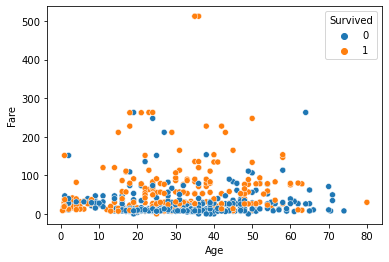

In [20]:
scatter_out = sns.scatterplot(data=titanic, 
                              x="Age", y="Fare", 
                              hue="Survived")

In [21]:
type(scatter_out)

matplotlib.axes._subplots.AxesSubplot

But we can't use the `col`/`row` options for faceting:

In [22]:
# sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Survived", col="Sex")  # uncomment to check the output

We can use these functions to create custom combinations of plots:

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

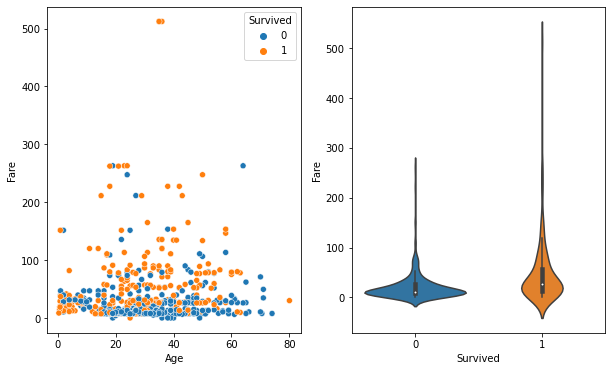

In [26]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Survived", ax=ax0)
sns.violinplot(data=titanic, x="Survived", y="Fare", ax=ax1)  # boxplot, stripplot,.. as alternative to represent distribution per category

__Note__ Check the similarity with the _best of both worlds_ approach:

1. Prepare with Matplotlib
2. Plot using Seaborn 
3. Further adjust specific elements with Matplotlib if needed

<div class="alert alert-info">

**Remember**

The `Axes` level Seaborn functions:    
    
- Do NOT support faceting by data variables 
- Return a Matplotlib `Axes`, hence the output can be used in combination with other Matplotlib `Axes` in the same `Figure`

</div>

## (OPTIONAL) exercises

<div class="alert alert-success">

**EXERCISE**

- Make a histogram of the age, split up in two subplots by the `Sex` of the passengers.
- Place both subplots underneath each other. 
- Use the `height` and `aspect` arguments of the plot function to adjust the size of the figure.
    
<details><summary>Hints</summary>

- When interested in a histogram, i.e. the distribution of data, use the `displot` module
- A split into subplots is requested using a variable of the DataFrame (faceting), so use the `Figure`-level function instead of the `Axes` level functions.
- Link a column name to the `row` argument for splitting into subplots row-wise.

</details>

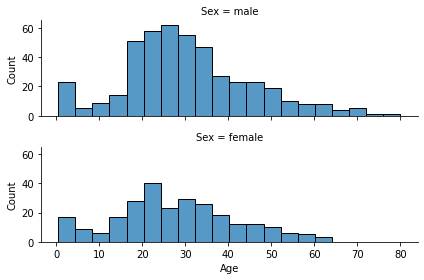

In [27]:
sns.displot(data=titanic, x="Age", row="Sex", aspect=3, height=2)

<div class="alert alert-success">

**EXERCISE**

Make a violin plot showing the `Age` distribution for each `Sex` in each of the `Pclass` categories:
    
- Use a different color for the `Age`.
- Use the `Pclass` to make a plot for each of the classes along the `x-axis`
- Check the behavior of the `split` argument and apply it to compare male/female.
- Use the `sns.despine` function to remove the boundaries around the plot.    
    
<details><summary>Hints</summary>

- Have a look at https://seaborn.pydata.org/examples/grouped_violinplots.html for inspiration.

</details>

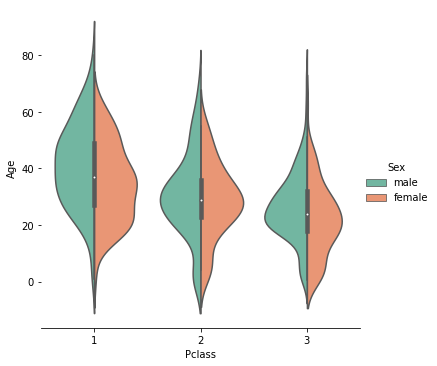

In [27]:
# Figure based
sns.catplot(data=titanic, x="Pclass", y="Age", 
            hue="Sex", split=True,
            palette="Set2", kind="violin")
sns.despine(left=True)

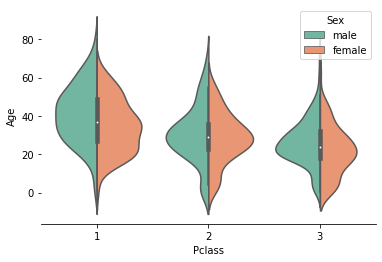

In [29]:
# Axes based
sns.violinplot(data=titanic, x="Pclass", y="Age", 
               hue="Sex", split=True,
               palette="Set2")
sns.despine(left=True)

## Some more Seaborn functionalities to remember

Whereas the `relplot`, `catplot` and `displot` represent the main components of the Seaborn library, more plotting functions are available. You can check the [gallery](https://seaborn.pydata.org/examples/index.html) yourself, but let's introduce a few of them:

__jointplot()__ and __pairplot()__

`jointplot()` and `pairplot()` are Figure-level functions and create figures with specific subplots by default:

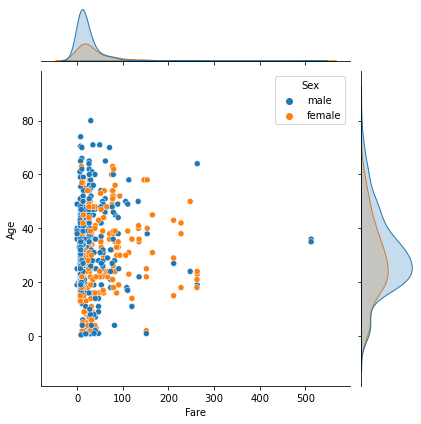

In [30]:
# joined distribution plot
sns.jointplot(data=titanic, x="Fare", y="Age", 
              hue="Sex", kind="scatter") # kde

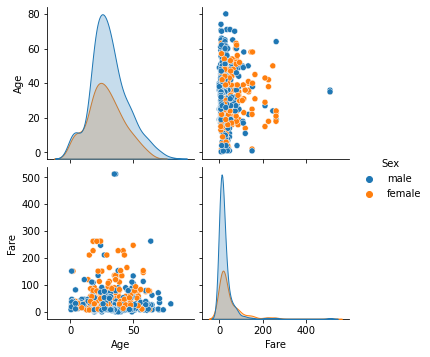

In [31]:
sns.pairplot(data=titanic[["Age", "Fare", "Sex"]], 
             hue="Sex")  # Also called scattermatrix plot

__heatmap()__

Plot rectangular data as a color-encoded matrix.

In [34]:
titanic_age_summary = titanic.pivot_table(columns="Pclass", index="Sex", 
                                          values="Age", aggfunc="mean")
titanic_age_summary

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

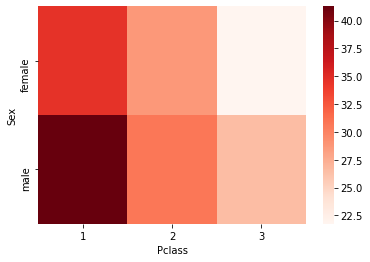

In [35]:
sns.heatmap(titanic_age_summary, cmap="Reds")

__lmplot() regressions__

`Figure` level function to generate a regression model fit across a FacetGrid:

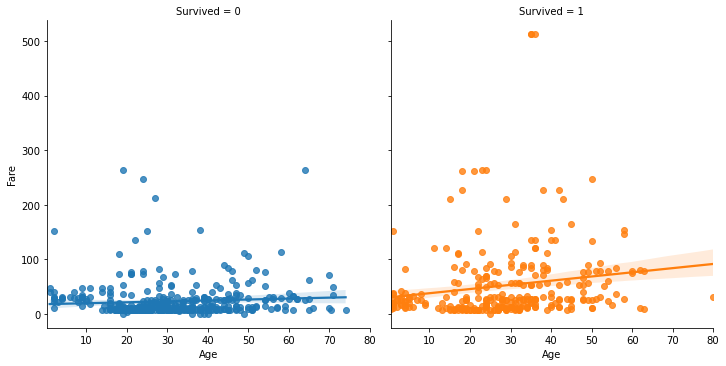

In [36]:
g = sns.lmplot(
    data=titanic, x="Age", y="Fare", 
    hue="Survived", col="Survived",  # hue="Pclass"
)

# Need more Seaborn inspiration? 

<div class="alert alert-info" style="font-size:18px">

__Remember__

[Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and package [documentation](https://seaborn.pydata.org/index.html)

</div>

<a id='this_is_tidy'></a>

# Recap: what is `tidy`?

If you're wondering what *tidy* data representations are, you can read the scientific paper by Hadley Wickham, http://vita.had.co.nz/papers/tidy-data.pdf. 

Here, we just introduce the main principle very briefly:

Compare:

#### un-tidy
        
| WWTP | Treatment A | Treatment B |
|:------|-------------|-------------|
| Destelbergen | 8.  | 6.3 |
| Landegem | 7.5  | 5.2 |
| Dendermonde | 8.3  | 6.2 |
| Eeklo | 6.5  | 7.2 |

*versus*

#### tidy

| WWTP | Treatment | pH |
|:------|:-------------:|:-------------:|
| Destelbergen | A  | 8. |
| Landegem | A  | 7.5 |
| Dendermonde | A  | 8.3 |
| Eeklo | A  | 6.5 |
| Destelbergen | B  | 6.3 |
| Landegem | B  | 5.2 |
| Dendermonde | B  | 6.2 |
| Eeklo | B  | 7.2 |

This is sometimes also referred as *short* versus *long* format for a specific variable... Seaborn (and other grammar of graphics libraries) work better on `tidy` (long format) data, as it better supports `groupby`-like transactions.

<div class="alert alert-info" style="font-size:16px">

**Remember:**

A tidy data set is setup as follows:
 
- Each <code>variable</code> forms a <b>column</b> and contains <code>values</code>
- Each <code>observation</code> forms a <b>row</b>
- Each type of <code>observational unit</code> forms a <b>table</b>.

</div>

